In [27]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')

import torch
import numpy as np
import matplotlib.pyplot as plt

from mavi.vanishing_ideal import VanishingIdeal
from mavi.util.preprocessing import Preprocessor

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


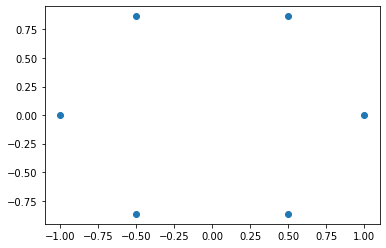

In [28]:
theta = [np.pi*i/3 for i in range(6)]
X = np.vstack((np.cos(theta), np.sin(theta))).T

plt.plot(X[:,0], X[:,1], "o")

In [29]:
X = np.repeat(X, 1000, axis=0)
Z = np.repeat(X, 20, axis=1)
print(X.shape, Z.shape)

(6000, 2) (6000, 40)


In [30]:
%%time
'''
Preprocessing remove redundant variables 
'''
pre = Preprocessor()
Z_ = pre.fit_transform(Z, th=.95, keep_dim=False)  # PCA-like preprocessing, 95% of power is kept.
print(Z_.shape)

(6000, 2)
CPU times: user 6.53 s, sys: 359 ms, total: 6.89 s
Wall time: 1.71 s


### Comparison in VCA

In [31]:
%%time
'''
Computation for 2-dim dataset X
'''
vi = VanishingIdeal()
vi.fit(X, 0.01, method="vca", backend='numpy')  

CPU times: user 7.09 s, sys: 1.3 s, total: 8.39 s
Wall time: 1.57 s


In [32]:
%%time
'''
Computation for 40-dim dataset Z
'''
vi = VanishingIdeal()
vi.fit(Z, 0.01, method="vca", backend='numpy')  

CPU times: user 12.3 s, sys: 1.48 s, total: 13.8 s
Wall time: 2.44 s


In [33]:
%%time
'''
Computation for preprocessed 2-dim dataset Z_
'''
vi = VanishingIdeal()
vi.fit(Z_, 0.01, method="vca", backend='numpy')  

CPU times: user 7.24 s, sys: 1.03 s, total: 8.27 s
Wall time: 1.66 s


### Comparison in Grad

In [34]:
%%time
'''
Computation for 2-dim dataset X
'''
vi = VanishingIdeal()
vi.fit(X, 0.01, method="grad", backend='numpy')  

CPU times: user 66.2 ms, sys: 3.63 ms, total: 69.8 ms
Wall time: 22.8 ms


In [35]:
%%time
'''
Computation for 40-dim dataset Z
'''
vi = VanishingIdeal()
vi.fit(Z, 0.01, method="grad", backend='numpy')  

CPU times: user 2.61 s, sys: 629 ms, total: 3.23 s
Wall time: 575 ms


In [36]:
%%time
'''
Computation for preprocessed 2-dim dataset Z_
'''
vi = VanishingIdeal()
vi.fit(Z_, 0.01, method="grad", backend='numpy')  

CPU times: user 58.7 ms, sys: 46.2 ms, total: 105 ms
Wall time: 13.6 ms


### Plot

CPU times: user 1.89 s, sys: 255 ms, total: 2.15 s
Wall time: 1.19 s


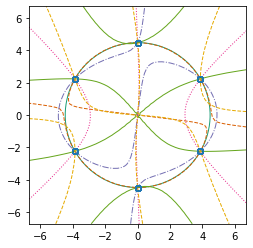

In [45]:
%%time
'''
Don't forget to apply ```pre.transform```
'''
vi = VanishingIdeal()
vi.fit(Z_, 0.01, method="grad", backend='numpy')  
vi.plot(pre.transform(Z))